In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
import pandas as pd
import numpy as np
import os
import json
import csv
import json

TL_sentence_path = '/content/drive/MyDrive/LSTM+attention/sentence_dataTL.csv'
VL_sentence_path = '/content/drive/MyDrive/LSTM+attention/sentence_dataVL.csv'

# data파일 불러오기
TL_sentence_data = pd.read_csv(TL_sentence_path, encoding='utf-8')
VL_sentence_data = pd.read_csv(VL_sentence_path, encoding='utf-8')

# 중복 제거, Pronuncication 열은 필요 없다고 생각
TL_sentence_data.drop('Pronunciation', axis=1, inplace=True)
TL_sentence_data = TL_sentence_data.drop_duplicates().reset_index(drop=True)
VL_sentence_data.drop('Pronunciation', axis=1, inplace=True)
VL_sentence_data = VL_sentence_data.drop_duplicates().reset_index(drop=True)

In [41]:
TL_sentence_data[:5]

,Dialect,Standard
0,여기는 옥수갱이 잘 된다 카던디 옥수갱이 말고는 무신 농사를 많이 짓습니껴,여기는 옥수수 잘 된다 하던데 옥수수 말고는 무슨 농사를 많이 짓습니까
1,장례 관련해서 초상집 같은 데 가가 하지 말아야 데는 기 있습니껴,장례 관련해서 초상집 같은 데 가서 하지 말아야 데는 게 있습니까
2,예전에는 집 안에서 여자들이 남자 위로 띠넘으면 안 덴다 캤습니껴,예전에는 집 안에서 여자들이 남자 위로 뛰어넘으면 안 된다 했습니까
3,음식을 많이 장만하려고 하면 일손이 모자라서 음식하기가 안 힘들었습니까,음식을 많이 장만하려고 하면 일손이 모자라서 음식하기가 안 힘들었습니까
4,이 구두 하나만 계속 신고 댕기이꺼네 인자 굽이 많이 닳아서 갈아야 되겠네,이 구두 하나만 계속 신고 다니니까 이제 굽이 많이 닳아서 갈아야 되겠네


In [42]:
VL_sentence_data[:5]

,Dialect,Standard
0,오랫동안 한 동네에서 살았던 할머니이제 도주식하면 매매 아프네요,오랫동안 한 동네에서 살았던 할머니인데 돌아가겨서 마음이 아프네요
1,혈압약은 시간을 맞춰 챙겨 드셔야지 안 그러면 효과가 없습니다,혈압약은 시간을 맞춰 챙겨 드셔야지 안 그러면 효과가 없습니다
2,집에 돌아와 보이꺼네 문이 열려 있고 뼈다지가 열어둔 돈 전부 없어지던 어이떼,집에 돌아와 보니까 문이 열려 있고 서랍이 열어둔 돈 전부 없어지던 어이떼
3,아들 오늘 중요한 시험 보니까에 이 생엿 하고 사가꼬 먹고 힘내서 시험 잘 봐레이,아들 오늘 중요한 시험 보니까 이 생 엿 하고 사서 먹고 힘내서 시험 잘 봐
4,옛날부터 조상꿈이나 돼지꿈 꾸만 집에 돈 많이 들어온다고 좋아 해지로,옛날부터 조상꿈이나 돼지꿈 꾸면 집에 돈 많이 들어온다고 좋아 했죠


In [43]:
standard_sentences_TL = TL_sentence_data['Standard']
dialect_sentences_TL = TL_sentence_data['Dialect']
standard_sentences_VL = VL_sentence_data['Standard']
dialect_sentences_VL = VL_sentence_data['Dialect']

In [44]:
standard_sentences_TL[:5]

0     여기는 옥수수 잘 된다 하던데 옥수수 말고는 무슨 농사를 많이 짓습니까
1        장례 관련해서 초상집 같은 데 가서 하지 말아야 데는 게 있습니까
2       예전에는 집 안에서 여자들이 남자 위로 뛰어넘으면 안 된다 했습니까
3     음식을 많이 장만하려고 하면 일손이 모자라서 음식하기가 안 힘들었습니까
4    이 구두 하나만 계속 신고 다니니까 이제 굽이 많이 닳아서 갈아야 되겠네
Name: Standard, dtype: object

In [45]:
dialect_sentences_TL[:5]

0    여기는 옥수갱이 잘 된다 카던디 옥수갱이 말고는 무신 농사를 많이 짓습니껴
1         장례 관련해서 초상집 같은 데 가가 하지 말아야 데는 기 있습니껴
2         예전에는 집 안에서 여자들이 남자 위로 띠넘으면 안 덴다 캤습니껴
3      음식을 많이 장만하려고 하면 일손이 모자라서 음식하기가 안 힘들었습니까
4    이 구두 하나만 계속 신고 댕기이꺼네 인자 굽이 많이 닳아서 갈아야 되겠네
Name: Dialect, dtype: object

In [46]:
# 학습 데이터 중에서 겹치는 표준어 문장과 방언 문장 제거
filtered_data_TR = {
    "src": [],
    "tar": []
}

for i in range(0, len(dialect_sentences_TL)):
    if (standard_sentences_TL[i] != dialect_sentences_TL[i]):
        filtered_data_TR["src"].append(dialect_sentences_TL[i])
        filtered_data_TR["tar"].append(standard_sentences_TL[i])

filtered_df_TR = pd.DataFrame(filtered_data_TR)

print(filtered_df_TR[:10])
print(len(filtered_df_TR))

                                              src  \
0       여기는 옥수갱이 잘 된다 카던디 옥수갱이 말고는 무신 농사를 많이 짓습니껴   
1            장례 관련해서 초상집 같은 데 가가 하지 말아야 데는 기 있습니껴   
2            예전에는 집 안에서 여자들이 남자 위로 띠넘으면 안 덴다 캤습니껴   
3       이 구두 하나만 계속 신고 댕기이꺼네 인자 굽이 많이 닳아서 갈아야 되겠네   
4            콩이파리는 가시가 있어가 꺼끄럽고 뻣뻣하고 묵어 보면 맛이 없어예   
5     여기에는 옥수갱이가 잘 된다 카던디 옥수갱이 말고는 무신 농사를 마이 짓습니껴   
6      여개는 옥수갱이가 잘 된다 카던디 옥수갱이 말고는 무신 농사를 마이 짓습니껴   
7   음식 먹으만 계속 설사하고 토하고 할 때는 물 많이 잡수고 병원에 가봐야 합니데이   
8  논두렁에 전선이 늘어져 있거나 정전이 됐을 때 두꺼비 집을 무짜로 만지만 위험합니더   
9             딱꾹지를 멈치지도 않고 점들 하는디 이럴 때는 우예 해야 합니껴   

                                              tar  
0         여기는 옥수수 잘 된다 하던데 옥수수 말고는 무슨 농사를 많이 짓습니까  
1            장례 관련해서 초상집 같은 데 가서 하지 말아야 데는 게 있습니까  
2           예전에는 집 안에서 여자들이 남자 위로 뛰어넘으면 안 된다 했습니까  
3        이 구두 하나만 계속 신고 다니니까 이제 굽이 많이 닳아서 갈아야 되겠네  
4              콩잎은 가시가 있어서 껄끄럽고 뻣뻣하고 먹어 보면 맛이 없어요  
5       여기에는 옥수수가 잘 된다 하던데 옥수수 말고는 무슨 농사를 많이 짓습니까  
6        여기는 옥수수가 잘 된다 하던데 옥수수 말고는 무슨 농사를 많이 짓습니까  


In [47]:
# 검증 데이터 중에서 겹치는 표준어 문장과 방언 문장 제거
filtered_data_VL = {
    "src": [],
    "tar": []
}

for i in range(0, len(dialect_sentences_VL)):
    if (standard_sentences_VL[i] != dialect_sentences_VL[i]):
        filtered_data_VL["src"].append(dialect_sentences_VL[i])
        filtered_data_VL["tar"].append(standard_sentences_VL[i])

filtered_df_VL = pd.DataFrame(filtered_data_VL)

print(filtered_df_VL[:10])
print(len(filtered_df_VL))

                                               src  \
0              오랫동안 한 동네에서 살았던 할머니이제 도주식하면 매매 아프네요   
1      집에 돌아와 보이꺼네 문이 열려 있고 뼈다지가 열어둔 돈 전부 없어지던 어이떼   
2    아들 오늘 중요한 시험 보니까에 이 생엿 하고 사가꼬 먹고 힘내서 시험 잘 봐레이   
3           옛날부터 조상꿈이나 돼지꿈 꾸만 집에 돈 많이 들어온다고 좋아 해지로   
4                  게얼에 먹을 채소나 과일 같은 것은 어데 보관을 했습니꺼   
5   촌구숙이라 젊은 사람들은 함부레 없고 전부 노인들만 있으이꺼네 농사 짓기가 힘들어요   
6  촌구석이라 젊은 사람들은 한 번이 없고 전부 노인들만 있으니까네 농사 짓기가 힘들어요   
7            소도 사람맨치로 잘 먹어야 근육도 붙고 심도 생겨서 일을 잘 하지로   
8           소도 사람 맨치로 잘 먹어야 근육도 붇고 힘도 생겨서 일을 잘 하지요   
9           옷가심을 짜를 때는 미리 선을 끟어 놓아야 쪽바리 잘 자를 수 있어예   

                                              tar  
0            오랫동안 한 동네에서 살았던 할머니인데 돌아가겨서 마음이 아프네요  
1       집에 돌아와 보니까 문이 열려 있고 서랍이 열어둔 돈 전부 없어지던 어이떼  
2      아들 오늘 중요한 시험 보니까 이 생 엿 하고 사서 먹고 힘내서 시험 잘 봐  
3           옛날부터 조상꿈이나 돼지꿈 꾸면 집에 돈 많이 들어온다고 좋아 했죠  
4                겨울에 먹을 채소나 과일 같은 것은 어디에 보관을 했습니까  
5    촌구석이라 젊은 사람들은 아예 없고 전부 노인들만 있으니까 농사 짓기가 힘들어요  
6  촌구석이라 젊은 사람들은 한 번이 없고 전부 노인들만 있으니까 농사 

In [48]:
import matplotlib
import matplotlib.pyplot as plt

# 문장 길이 계산
def sentenceLengths(sentences):
    return [len(sentence.split(' ')) for sentence in sentences]

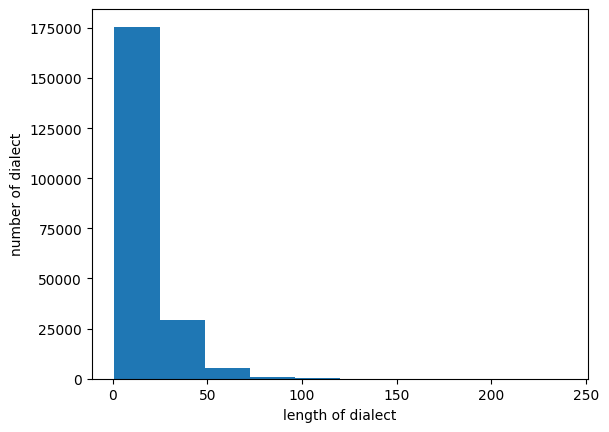

In [49]:
plt.hist(sentenceLengths(filtered_data_TR['src']), bins=10)
plt.xlabel('length of dialect')
plt.ylabel('number of dialect')
plt.show()

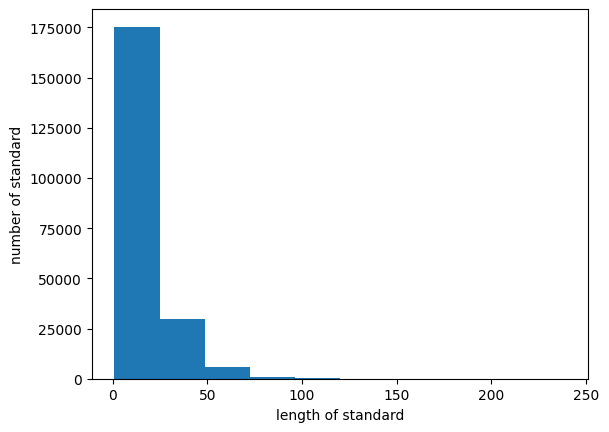

In [50]:
plt.hist(sentenceLengths(filtered_data_TR['tar']), bins=10)
plt.xlabel('length of standard')
plt.ylabel('number of standard')
plt.show()

In [51]:
def threshold_len_max(max_len, data):
    data = list(data)  # 제네레이터를 리스트로 변환
    sentence_count = 0
    for sentence in data:
        if len(sentence) <= max_len:
            sentence_count += 1
    return sentence_count / len(data) * 100

def threshold_len_min(min_len, data):
    data = list(data)  # 제네레이터를 리스트로 변환
    sentence_count = 0
    for sentence in data:
        if len(sentence) >= min_len:
            sentence_count += 1
    return sentence_count / len(data) * 100

In [52]:
len(filtered_data_TR['src'])

211878

In [53]:
max_len = 22
dialect_max = threshold_len_max(max_len, (sentence.split(' ') for sentence in filtered_data_TR['src']))
standard_max = threshold_len_max(max_len, (sentence.split(' ') for sentence in filtered_data_TR['tar']))

print(f"dialect 중 {max_len} 이하인 비율은 {dialect_max}")
print(f"standard 중 {max_len} 이하인 비율은 {standard_max}")

dialect 중 22 이하인 비율은 80.23060440442141
standard 중 22 이하인 비율은 80.11355591425254


In [54]:
## 문장의 길이가 긴 것이 많아 80프로 정도의 데이터만 남김

d_filter_indices = [i for i, sentence in enumerate(sentence.split(' ') for sentence in filtered_data_TR['src']) if len(sentence) <= max_len ]
s_filter_indices = [i for i, sentence in enumerate(sentence.split(' ') for sentence in filtered_data_TR['tar']) if len(sentence) <= max_len ]

In [55]:
indices = list(set(d_filter_indices) & set(s_filter_indices))

In [56]:
len(indices)

169723

In [57]:
import pickle
1
# pickle 파일로부터 데이터를 불러옴
with open('/content/drive/MyDrive/LSTM+attention/filtered_dialect.pkl', 'rb') as f:
    filtered_dialect = pickle.load(f)

with open('/content/drive/MyDrive/LSTM+attention/filtered_standard.pkl', 'rb') as f:
    filtered_standard = pickle.load(f)

# 불러온 데이터를 확인
print(filtered_dialect[:10])
print(filtered_standard[:10])

['여기는 옥수갱이 잘 된다 카던디 옥수갱이 말고는 무신 농사를 많이 짓습니껴', '장례 관련해서 초상집 같은 데 가가 하지 말아야 데는 기 있습니껴', '예전에는 집 안에서 여자들이 남자 위로 띠넘으면 안 덴다 캤습니껴', '이 구두 하나만 계속 신고 댕기이꺼네 인자 굽이 많이 닳아서 갈아야 되겠네', '콩이파리는 가시가 있어가 꺼끄럽고 뻣뻣하고 묵어 보면 맛이 없어예', '여기에는 옥수갱이가 잘 된다 카던디 옥수갱이 말고는 무신 농사를 마이 짓습니껴', '여개는 옥수갱이가 잘 된다 카던디 옥수갱이 말고는 무신 농사를 마이 짓습니껴', '음식 먹으만 계속 설사하고 토하고 할 때는 물 많이 잡수고 병원에 가봐야 합니데이', '논두렁에 전선이 늘어져 있거나 정전이 됐을 때 두꺼비 집을 무짜로 만지만 위험합니더', '딱꾹지를 멈치지도 않고 점들 하는디 이럴 때는 우예 해야 합니껴']
['여기는 옥수수 잘 된다 하던데 옥수수 말고는 무슨 농사를 많이 짓습니까', '장례 관련해서 초상집 같은 데 가서 하지 말아야 데는 게 있습니까', '예전에는 집 안에서 여자들이 남자 위로 뛰어넘으면 안 된다 했습니까', '이 구두 하나만 계속 신고 다니니까 이제 굽이 많이 닳아서 갈아야 되겠네', '콩잎은 가시가 있어서 껄끄럽고 뻣뻣하고 먹어 보면 맛이 없어요', '여기에는 옥수수가 잘 된다 하던데 옥수수 말고는 무슨 농사를 많이 짓습니까', '여기는 옥수수가 잘 된다 하던데 옥수수 말고는 무슨 농사를 많이 짓습니까', '음식 먹으면 계속 설사하고 토하고 할 때는 물 많이 잡수고 병원에 가봐야 합니다', '논두렁에 전선이 늘어져 있거나 정전이 됐을 때 두꺼비 집을 함부로 만지면 위험합니다', '딱꾹지를 멈추지도 않고 점들 하는데 이럴 때는 어떻게 해야 합니까']


In [58]:
print(len(filtered_dialect))
print(len(filtered_standard))

169723
169723


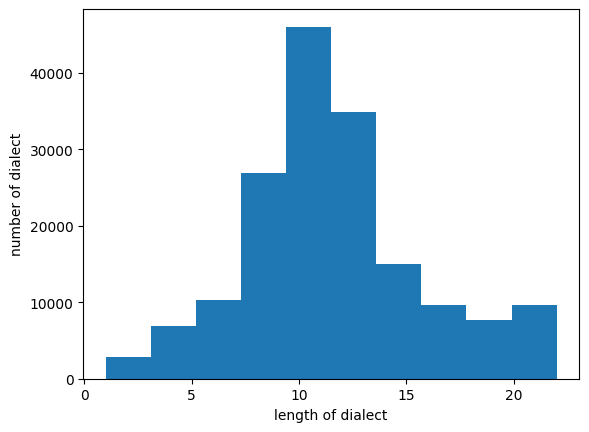

In [59]:
plt.hist(sentenceLengths(filtered_dialect), bins=10)
plt.xlabel('length of dialect')
plt.ylabel('number of dialect')
plt.show()

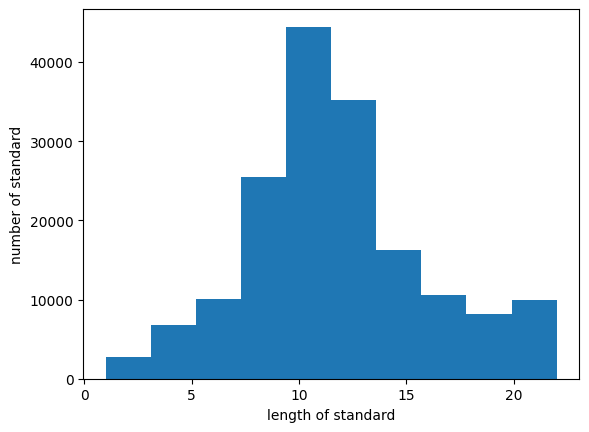

In [60]:
plt.hist(sentenceLengths(filtered_standard), bins=10)
plt.xlabel('length of standard')
plt.ylabel('number of standard')
plt.show()

In [61]:
SOS_token = 0
EOS_token = 1
UNK_token = 2
PAD_token = 3

class Lang:
    def __init__(self, name):
        self.name = name
        self.word2index = {"UNK": 2}
        self.word2count = {}

        self.index2word = {0: "SOS", 1: "EOS", 2: "UNK", 3: "PAD"}
        self.n_words = 4  # SOS, EOS, UNK, PAD

    def addSentence(self, sentence):
        for word in sentence.split(" "):
            self.addWord(word)

    def addWord(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.n_words
            self.word2count[word] = 1
            self.index2word[self.n_words] = word
            self.n_words += 1
        else:
            self.word2count[word] += 1

    def getWordIndex(self, word):
        return self.word2index.get(word, self.word2index["UNK"])

    def saveLang(self, filename):
        with open(filename, 'w', encoding='utf-8') as f:
            json.dump({
                'word2index': self.word2index,
                'index2word': self.index2word,
                'n_words': self.n_words
            }, f, ensure_ascii=False, indent=4)

    def loadLang(self, filename):
        with open(filename, 'r', encoding='utf-8') as f:
            data = json.load(f)
            self.word2index = data['word2index']
            self.index2word = data['index2word']
            self.n_words = data['n_words']

In [62]:
# Lang 객체 생성
dialect_lang = Lang("Dialect")
standard_lang = Lang("Standard")

# 문장 추가
for sentence in filtered_dialect:
    dialect_lang.addSentence(sentence)
for sentence in filtered_standard:
    standard_lang.addSentence(sentence)

for sentence in filtered_df_VL['src']:
    dialect_lang.addSentence(sentence)
for sentence in filtered_df_VL['tar']:
    standard_lang.addSentence(sentence)

# 문장
pairs = list(zip(filtered_dialect[:10], filtered_standard[:10]))
VL_pairs = list(zip(filtered_df_VL['src'][:10], filtered_df_VL['tar'][:10]))

# 문장을 인덱스로 변환
def indexesFromSentence(lang, sentence):
    return [lang.getWordIndex(word) for word in sentence.split(' ')]

def tensorFromSentence(lang, sentence, max_length):
    indexes = indexesFromSentence(lang, sentence)
    indexes.append(EOS_token)
    if len(indexes) < max_length:
        indexes += [PAD_token] * (max_length - len(indexes))
    elif len(indexes) > max_length:
        indexes = indexes[:max_length-1] + [EOS_token]
    return torch.tensor(indexes, dtype=torch.long).view(-1, 1)

def tensorsFromPair(pair):
    input_tensor = tensorFromSentence(dialect_lang, pair[0], max_len)
    target_tensor = tensorFromSentence(standard_lang, pair[1], max_len)
    return (input_tensor, target_tensor)

In [63]:
import torch
import torch.nn as nn
import torch.optim as optim

max_len = 22

# 검증 데이터를 인덱스로 변환
validation_input_tensors = [tensorFromSentence(dialect_lang, pair[0], max_len) for pair in VL_pairs]
validation_target_tensors = [tensorFromSentence(standard_lang, pair[1], max_len) for pair in VL_pairs]

# 모델 정의
class EncoderRNN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(EncoderRNN, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(input_size, hidden_size)
        self.lstm = nn.LSTM(hidden_size, hidden_size)

    def forward(self, input, hidden):
        embedded = self.embedding(input).view(1, 1, -1)
        output, hidden = self.lstm(embedded, hidden)
        return output, hidden

    def initHidden(self):
        return (torch.zeros(1, 1, self.hidden_size),
                torch.zeros(1, 1, self.hidden_size))

class AttnDecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size, dropout_p=0.1, max_length=max_len):
        super(AttnDecoderRNN, self).__init__()
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.dropout_p = dropout_p
        self.max_length = max_length

        self.embedding = nn.Embedding(self.output_size, self.hidden_size)
        self.attn = nn.Linear(self.hidden_size * 2, self.max_length)
        self.attn_combine = nn.Linear(self.hidden_size * 2, self.hidden_size)
        self.dropout = nn.Dropout(self.dropout_p)
        self.lstm = nn.LSTM(self.hidden_size, self.hidden_size)
        self.out = nn.Linear(self.hidden_size, self.output_size)

    def forward(self, input, hidden, encoder_outputs):
        embedded = self.embedding(input).view(1, 1, -1)
        embedded = self.dropout(embedded)

        attn_weights = nn.functional.softmax(
            self.attn(torch.cat((embedded[0], hidden[0][0]), 1)), dim=1)
        attn_applied = torch.bmm(attn_weights.unsqueeze(0),
                                 encoder_outputs.unsqueeze(0))

        output = torch.cat((embedded[0], attn_applied[0]), 1)
        output = self.attn_combine(output).unsqueeze(0)

        output = nn.functional.relu(output)
        output, hidden = self.lstm(output, hidden)

        output = nn.functional.log_softmax(self.out(output[0]), dim=1)
        return output, hidden, attn_weights

    def initHidden(self):
        return (torch.zeros(1, 1, self.hidden_size),
                torch.zeros(1, 1, self.hidden_size))

In [68]:
import random
import time
import math

def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return f'{m}m {s:.2f}s'

def timeSince(since, percent):
    now = time.time()
    s = now - since
    es = s / (percent)
    rs = es - s
    return f'{asMinutes(s)} (- {asMinutes(rs)})'

# 모델 훈련 함수
def train(input_tensor, target_tensor, encoder, decoder, encoder_optimizer, decoder_optimizer, criterion, max_length=max_len):
    encoder_hidden = encoder.initHidden()

    encoder_optimizer.zero_grad()
    decoder_optimizer.zero_grad()

    input_length = input_tensor.size(0)
    target_length = target_tensor.size(0)

    encoder_outputs = torch.zeros(max_length, encoder.hidden_size)

    loss = 0

    for ei in range(input_length):
        encoder_output, encoder_hidden = encoder(input_tensor[ei], encoder_hidden)
        encoder_outputs[ei] = encoder_output[0, 0]

    decoder_input = torch.tensor([[SOS_token]])

    decoder_hidden = encoder_hidden

    for di in range(target_length):
        decoder_output, decoder_hidden, decoder_attention = decoder(
            decoder_input, decoder_hidden, encoder_outputs)
        topv, topi = decoder_output.topk(1)
        decoder_input = topi.squeeze().detach()  # 다음 입력으로 사용

        loss += criterion(decoder_output, target_tensor[di])
        if decoder_input.item() == EOS_token:
            break

    loss.backward()

    encoder_optimizer.step()
    decoder_optimizer.step()

    return loss.item() / target_length

def evaluate(encoder, decoder, input_tensor, target_tensor, criterion, max_length=max_len):
    with torch.no_grad():
        encoder_hidden = encoder.initHidden()

        input_length = input_tensor.size(0)
        target_length = target_tensor.size(0)

        encoder_outputs = torch.zeros(max_length, encoder.hidden_size)

        loss = 0

        for ei in range(input_length):
            encoder_output, encoder_hidden = encoder(input_tensor[ei], encoder_hidden)
            encoder_outputs[ei] = encoder_output[0, 0]

        decoder_input = torch.tensor([[SOS_token]])

        decoder_hidden = encoder_hidden

        decoded_words = []

        for di in range(target_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            topv, topi = decoder_output.topk(1)
            decoder_input = topi.squeeze().detach()  # 다음 입력으로 사용

            loss += criterion(decoder_output, target_tensor[di])
            if decoder_input.item() == EOS_token:
                decoded_words.append('<EOS>')
                break
            else:
                decoded_words.append(standard_lang.index2word[topi.item()])

        return loss.item() / target_length, decoded_words

def trainIters(encoder, decoder, n_iters, print_every=1000, plot_every=100, learning_rate=0.01):
    start = time.time()
    plot_losses = []
    plot_val_losses = []
    print_loss_total = 0  # Reset every print_every
    plot_loss_total = 0  # Reset every plot_every
    val_loss_total = 0
    val_loss_avg = 0

    encoder_optimizer = optim.SGD(encoder.parameters(), lr=learning_rate)
    decoder_optimizer = optim.SGD(decoder.parameters(), lr=learning_rate)
    training_pairs = [tensorsFromPair(random.choice(pairs)) for _ in range(n_iters)]
    criterion = nn.NLLLoss()

    for iter in range(1, n_iters + 1):
        training_pair = training_pairs[iter - 1]
        input_tensor = training_pair[0]
        target_tensor = training_pair[1]

        loss = train(input_tensor, target_tensor, encoder,
                     decoder, encoder_optimizer, decoder_optimizer, criterion, max_len)
        print_loss_total += loss
        plot_loss_total += loss

        # 검증 데이터에 대한 손실 계산
        if iter % print_every == 0:
            val_loss_total = 0
            for val_input, val_target in zip(validation_input_tensors, validation_target_tensors):
                val_loss, _ = evaluate(encoder, decoder, val_input, val_target, criterion, max_len)
                val_loss_total += val_loss

            val_loss_avg = val_loss_total / len(validation_input_tensors)
            print_loss_avg = print_loss_total / print_every
            print_loss_total = 0
            print(f'{timeSince(start, iter / n_iters)} ({iter} {iter / n_iters * 100:.2f}%) '
                  f'Train Loss: {print_loss_avg:.4f}, Val Loss: {val_loss_avg:.4f}')

        if iter % plot_every == 0:
            plot_loss_avg = plot_loss_total / plot_every
            plot_val_losses.append(val_loss_avg)
            plot_losses.append(plot_loss_avg)
            plot_loss_total = 0

    showPlot(plot_losses, plot_val_losses)

def showPlot(train_losses, val_losses):
    plt.figure()
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [ ]:
def test(encoder, decoder, sentence, max_length=max_len):
    with torch.no_grad():
        input_tensor = tensorFromSentence(dialect_lang, sentence, max_length)
        input_length = input_tensor.size()[0]
        encoder_hidden = encoder.initHidden()

        encoder_outputs = torch.zeros(max_length, encoder.hidden_size)

        for ei in range(input_length):
            encoder_output, encoder_hidden = encoder(input_tensor[ei], encoder_hidden)
            encoder_outputs[ei] = encoder_output[0, 0]

        decoder_input = torch.tensor([[SOS_token]])
        decoder_hidden = encoder_hidden

        decoded_words = []

        for di in range(max_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            topv, topi = decoder_output.topk(1)
            if topi.item() == EOS_token:
                decoded_words.append('<EOS>')
                break
            else:
                decoded_words.append(standard_lang.index2word[topi.item()])

            decoder_input = topi.squeeze().detach()

        return decoded_words

0m 12.51s (- 1m 52.60s) (100 10.00%) Train Loss: 2.6009, Val Loss: 3.2177
0m 22.69s (- 1m 30.76s) (200 20.00%) Train Loss: 1.6699, Val Loss: 4.1320
0m 33.58s (- 1m 18.36s) (300 30.00%) Train Loss: 1.5512, Val Loss: 4.4176
0m 44.24s (- 1m 6.37s) (400 40.00%) Train Loss: 1.4290, Val Loss: 4.4798
0m 55.07s (- 0m 55.07s) (500 50.00%) Train Loss: 1.3086, Val Loss: 4.1685
1m 5.12s (- 0m 43.41s) (600 60.00%) Train Loss: 1.2437, Val Loss: 5.1896
1m 15.75s (- 0m 32.47s) (700 70.00%) Train Loss: 1.1878, Val Loss: 5.2546
1m 26.22s (- 0m 21.56s) (800 80.00%) Train Loss: 1.0526, Val Loss: 4.7955
1m 36.49s (- 0m 10.72s) (900 90.00%) Train Loss: 0.6964, Val Loss: 5.1462
1m 45.93s (- 0m 0.00s) (1000 100.00%) Train Loss: 0.7646, Val Loss: 5.2876


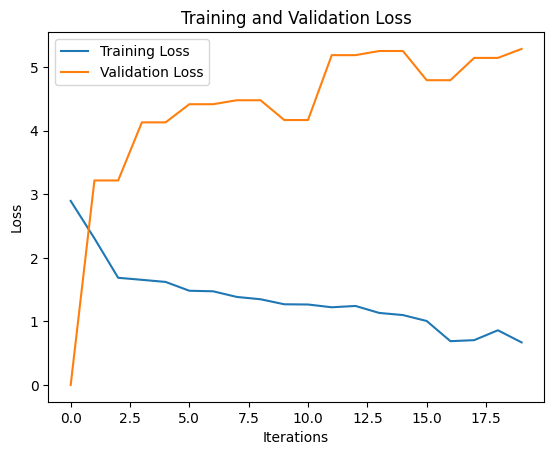

In [69]:
# 모델 초기화 및 훈련
hidden_size = 256
encoder = EncoderRNN(dialect_lang.n_words, hidden_size)
decoder = AttnDecoderRNN(hidden_size, standard_lang.n_words, dropout_p=0.1)

trainIters(encoder, decoder, 1000, print_every=100, plot_every=50)  # 적은 수의 iteration으로 실행

In [ ]:
# 모델 학습 후 사전 저장
dialect_lang.saveLang('dialect_lang.json')
standard_lang.saveLang('standard_lang.json')

In [ ]:
def saveModel(encoder, decoder, encoder_path='encoder.pth', decoder_path='decoder.pth'):    ## 모델 저장
    torch.save(encoder.state_dict(), encoder_path)
    torch.save(decoder.state_dict(), decoder_path)

In [ ]:
def loadModel(encoder_path='encoder.pth', decoder_path='decoder.pth'):      ## 모델 로드
    encoder = EncoderRNN(dialect_lang.n_words, hidden_size)
    decoder = AttnDecoderRNN(hidden_size, standard_lang.n_words, dropout_p=0.1)
    encoder.load_state_dict(torch.load(encoder_path))
    decoder.load_state_dict(torch.load(decoder_path))
    return encoder, decoder

In [ ]:
encoder_path = '/content/drive/MyDrive/LSTM+attention/test_encoder.pth'
decoder_path = '/content/drive/MyDrive/LSTM+attention/test_decoder.pth'

In [ ]:
saveModel(encoder, decoder, encoder_path, decoder_path)

In [ ]:
# 모델 평가 함수
def evaluateRandomly(encoder, decoder, test_paris ,n=10):
    for i in range(n):
        pair = random.choice(test_pairs)
        print('Dialect:', pair[0])
        print('Expected:', pair[1])
        output_words = test(encoder, decoder, pair[0])
        output_sentence = ' '.join(output_words)
        print('Predicted:', output_sentence)
        print('')

In [ ]:
## 테스트 데이터 준비
test_dialect_sentences = ["밥 무나?", "와 이리 더운교?", "이거 맛있다카이", "오늘 날씨 좋네예"]
test_standard_sentences = ["밥 먹었니?", "왜 이렇게 덥지?", "이거 맛있다고 하네", "오늘 날씨 좋네"]

test_pairs = list(zip(test_dialect_sentences, test_standard_sentences))

# 저장된 모델 불러오기
encoder, decoder = loadModel(encoder_path, decoder_path)

In [ ]:
# 모델 평가 실행
evaluateRandomly(encoder, decoder, test_pairs, n=len(test_pairs))